<a href="https://colab.research.google.com/github/IshitaLohia/Customer-Segmentation/blob/main/Retail_Dataset_EDA_and_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# New Section

In [4]:
import pandas as pd
import openpyxl

# Load the Excel file
df = pd.read_excel("/content/sample_data/Retail.xlsx", engine="openpyxl")


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:


# Display basic information
print(df.info())

# Show first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    

In [7]:
#Handle Missing Values

# Drop missing Customer IDs (since they are important for segmentation)
df = df.dropna(subset=['CustomerID'])

# Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a Total Sales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']



<ipython-input-7-65fa1f9b1e12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-7-65fa1f9b1e12>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSales'] = df['Quantity'] * df['UnitPrice']


<ipython-input-8-aa5e670a0480>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")


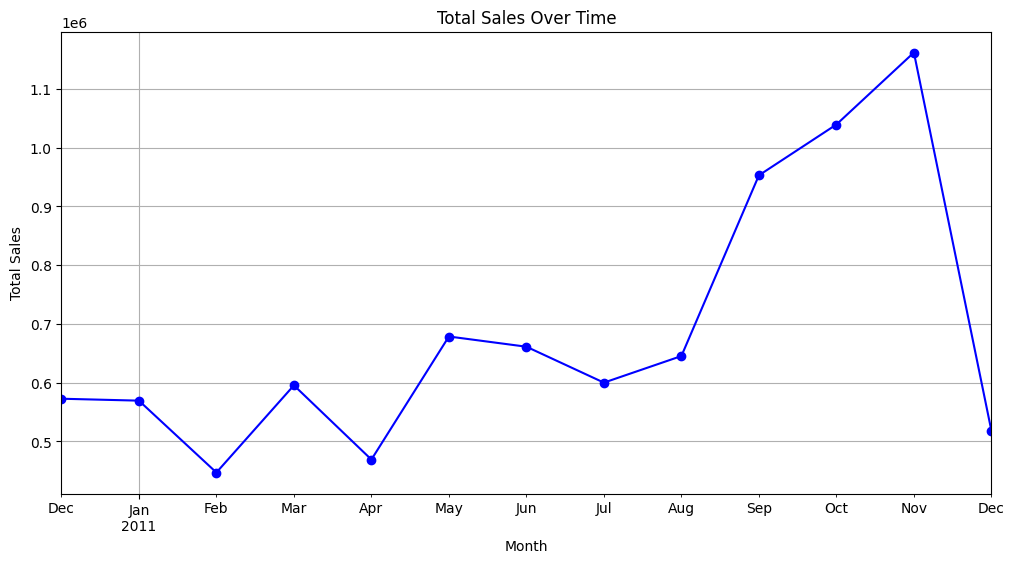

In [8]:
# Sales Trend Analysis

# Aggregate sales per month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")
monthly_sales = df.groupby('InvoiceMonth')['TotalSales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()




<ipython-input-9-ab1193efbea9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


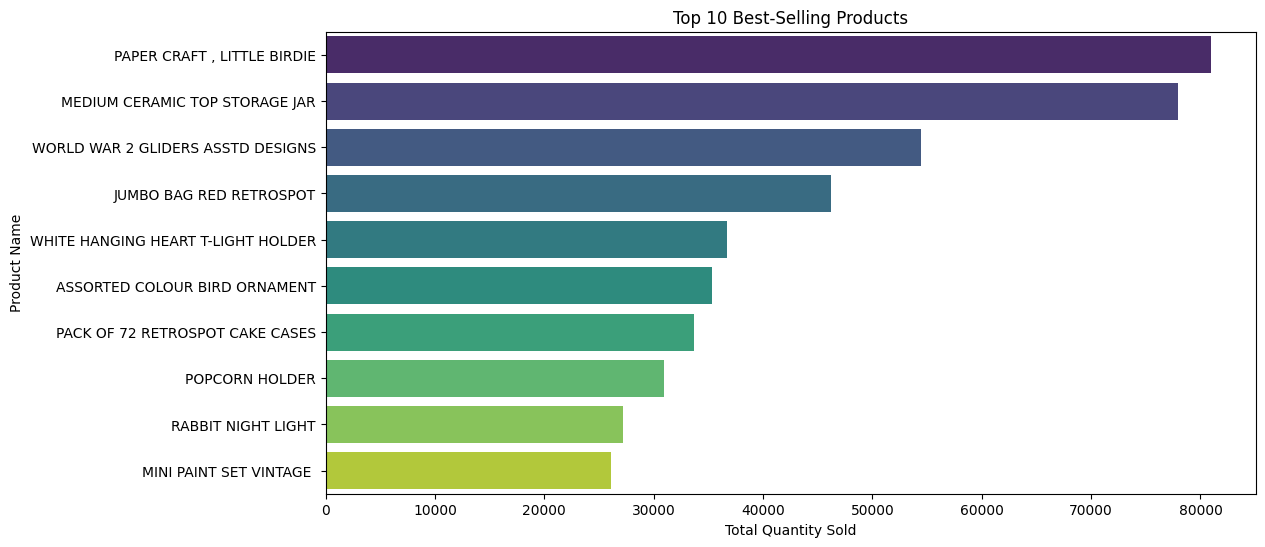

In [9]:
# Best Selling products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


In [10]:
#Customer Segmentation (RFM)

import datetime as dt

# Define snapshot date (latest date in dataset)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSales': 'sum'  # Monetary
})

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSales': 'Monetary'}, inplace=True)

# Display first few rows
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


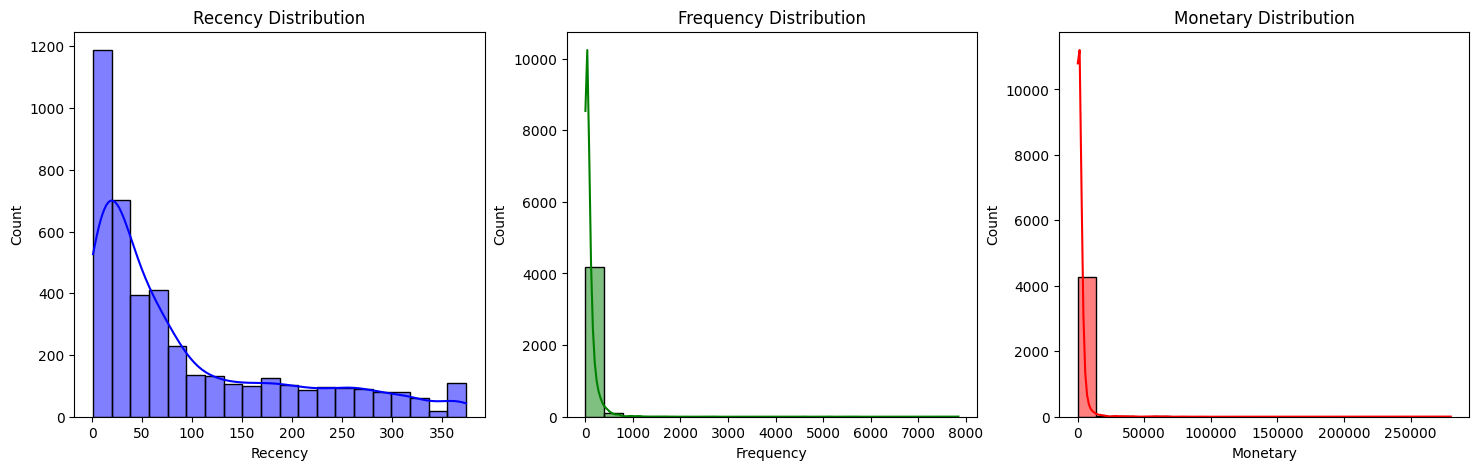

In [11]:
#Visualizing RFM

# Histogram of RFM Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Recency Distribution")

sns.histplot(rfm['Frequency'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm['Monetary'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title("Monetary Distribution")

plt.show()


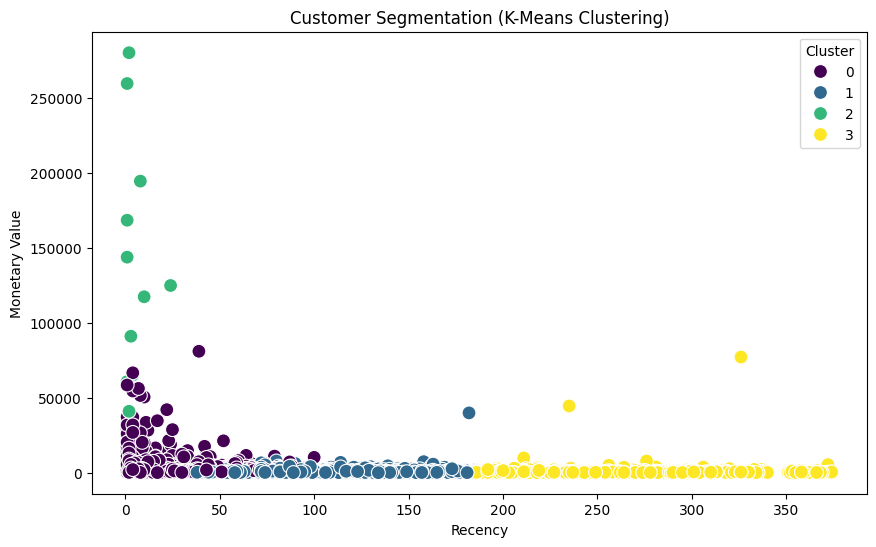

In [12]:
#Customer Segmentation Using K-means Clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Plot Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='viridis', s=100)
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.show()


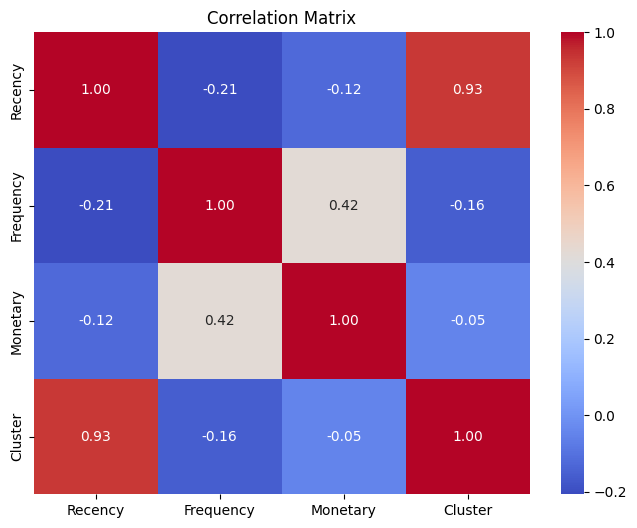

In [13]:
#Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(rfm.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


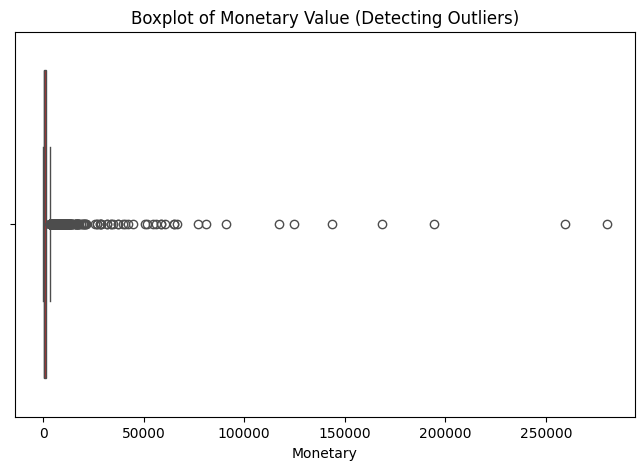

In [14]:
#Outlier Detection

plt.figure(figsize=(8, 5))
sns.boxplot(x=rfm['Monetary'], color="red")
plt.title("Boxplot of Monetary Value (Detecting Outliers)")
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/sample_data/Retail.xlsx", engine="openpyxl")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<ipython-input-16-bc22db5afdd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


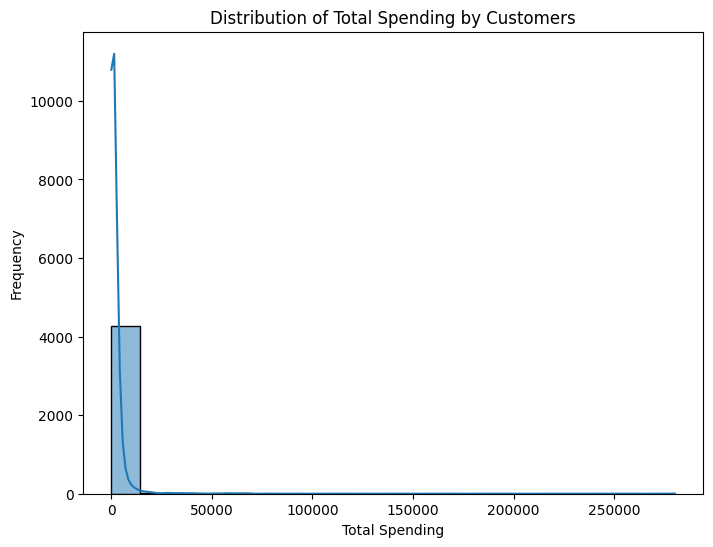

In [16]:

# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate data for EDA
customer_data = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',  # Number of unique transactions
    'UnitPrice': 'mean',
    'InvoiceDate': 'count'  # Assuming time-based transactions
}).rename(columns={'InvoiceNo': 'NumTransactions', 'InvoiceDate': 'NumDays'})

# Exploratory Data Analysis (EDA) with Business Questions

# 1. Distribution of Total Spending
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['TotalPrice'], bins=20, kde=True)
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.title("Distribution of Total Spending by Customers")
plt.show()


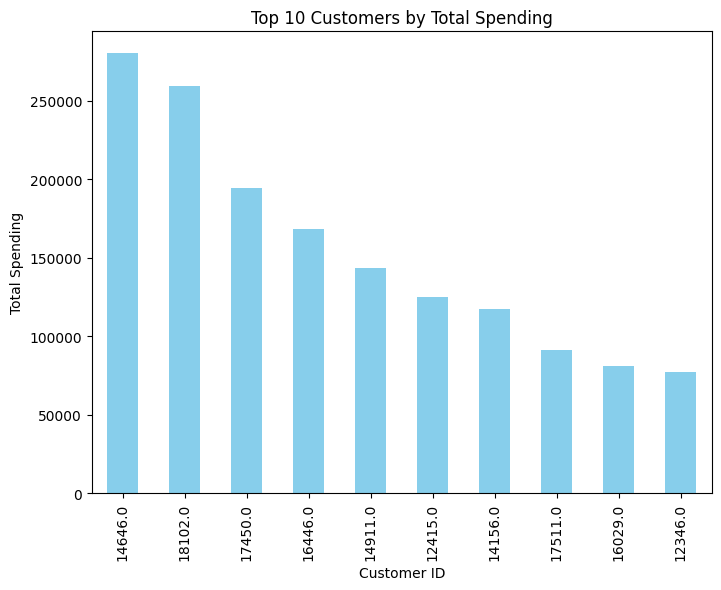

In [17]:

# 2. Top 10 Customers by Spending
top_customers = customer_data['TotalPrice'].nlargest(10)
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.title("Top 10 Customers by Total Spending")
plt.show()



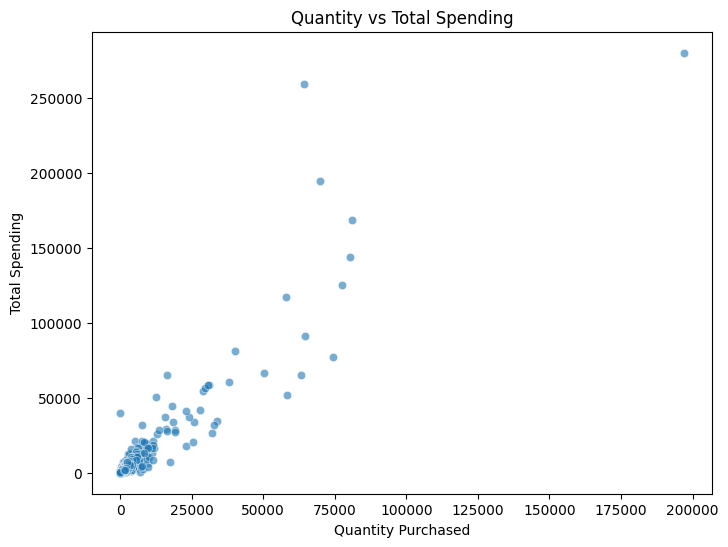

In [18]:
# 3. Relationship Between Quantity Purchased and Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['Quantity'], y=customer_data['TotalPrice'], alpha=0.6)
plt.xlabel("Quantity Purchased")
plt.ylabel("Total Spending")
plt.title("Quantity vs Total Spending")
plt.show()



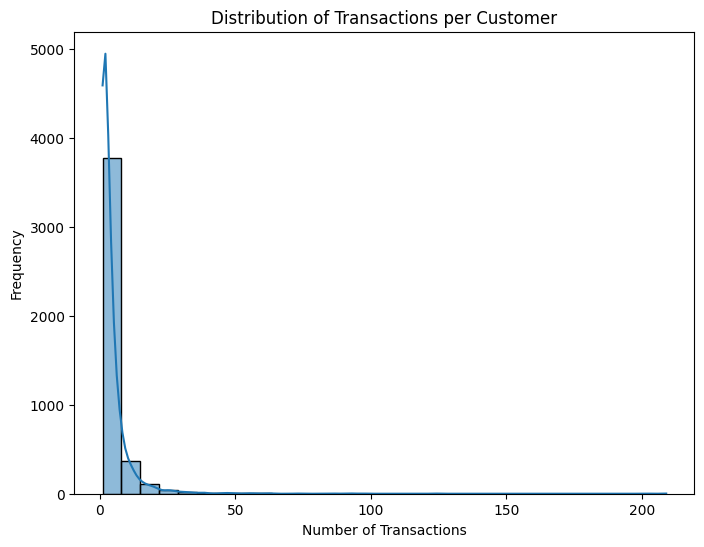

In [19]:
# 4. Number of Transactions per Customer
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['NumTransactions'], bins=30, kde=True)
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.title("Distribution of Transactions per Customer")
plt.show()


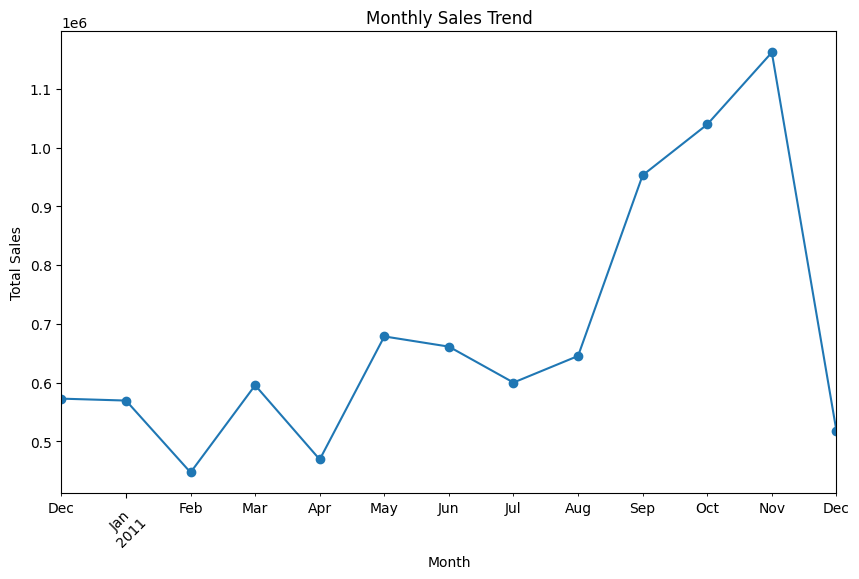

In [20]:

# 5. Monthly Sales Trend
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


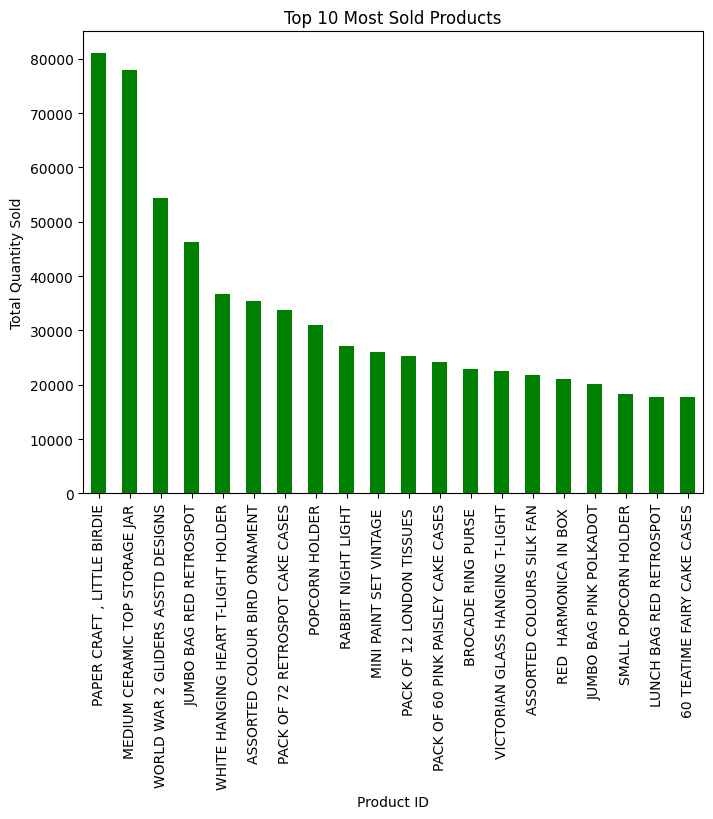

In [21]:

# 6. Most Sold Products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(20)
plt.figure(figsize=(8, 6))
top_products.plot(kind='bar', color='green')
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Most Sold Products")
plt.show()


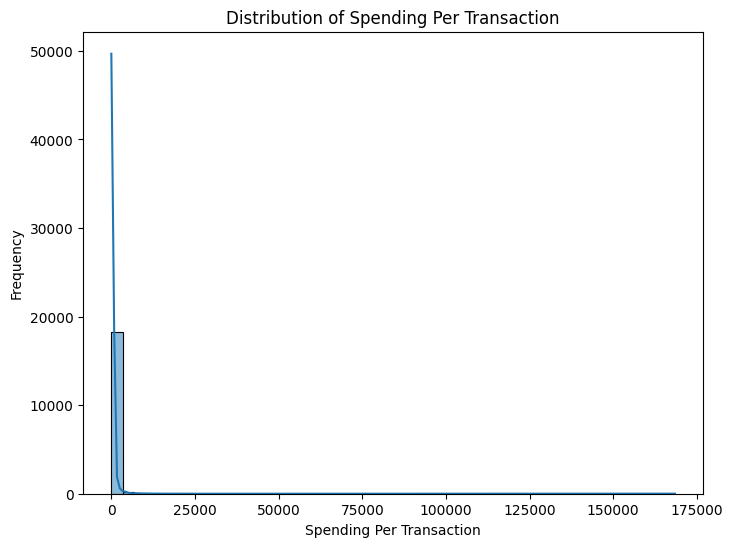

In [22]:

# 7. Average Spending Per Transaction
plt.figure(figsize=(8, 6))
sns.histplot(df.groupby('InvoiceNo')['TotalPrice'].sum(), bins=50, kde=True)
plt.xlabel("Spending Per Transaction")
plt.ylabel("Frequency")
plt.title("Distribution of Spending Per Transaction")
plt.show()





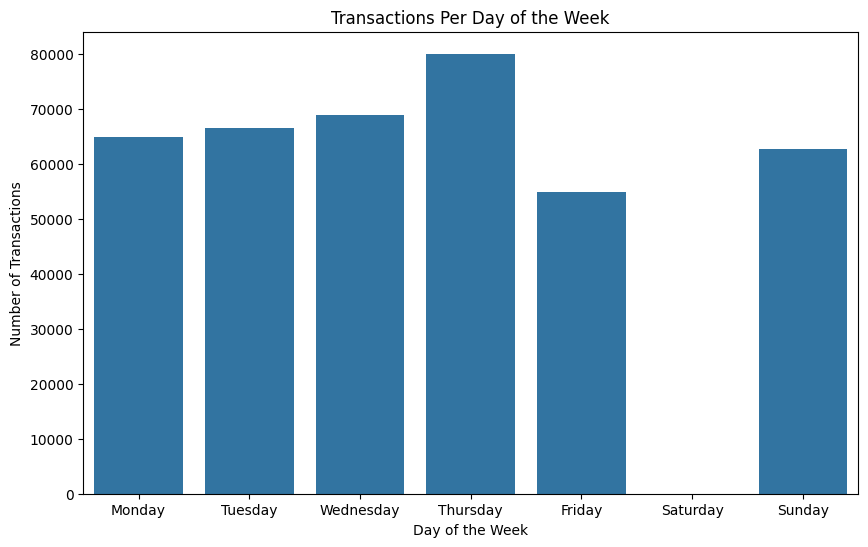

In [23]:

# 8. Day of the Week Analysis
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Day of the Week")
plt.show()


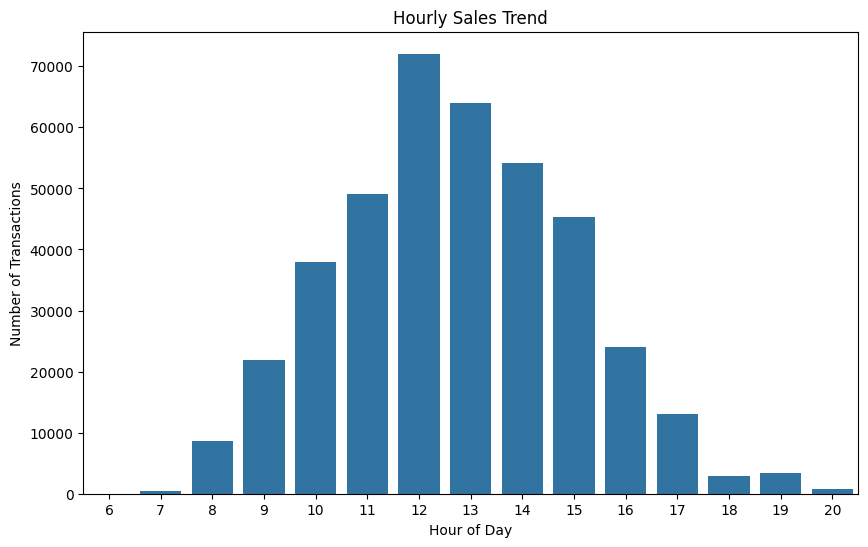

In [24]:

# 9. Hourly Sales Trend
df['Hour'] = df['InvoiceDate'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.title("Hourly Sales Trend")
plt.show()



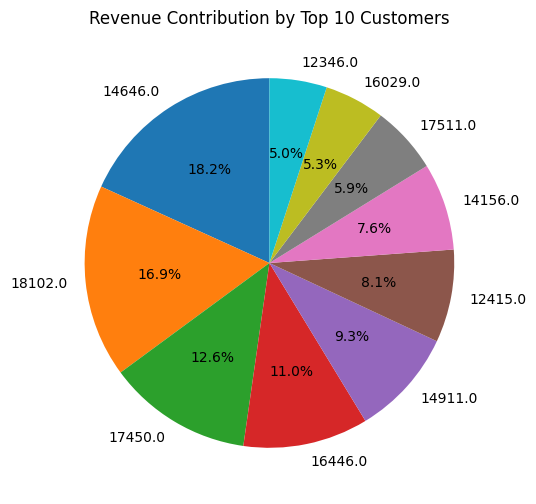

In [25]:
# 10. Revenue Contribution by Top 10 Customers
top_customers_revenue = customer_data.nlargest(10, 'TotalPrice')
plt.figure(figsize=(8, 6))
top_customers_revenue['TotalPrice'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue Contribution by Top 10 Customers")
plt.ylabel("")
plt.show()

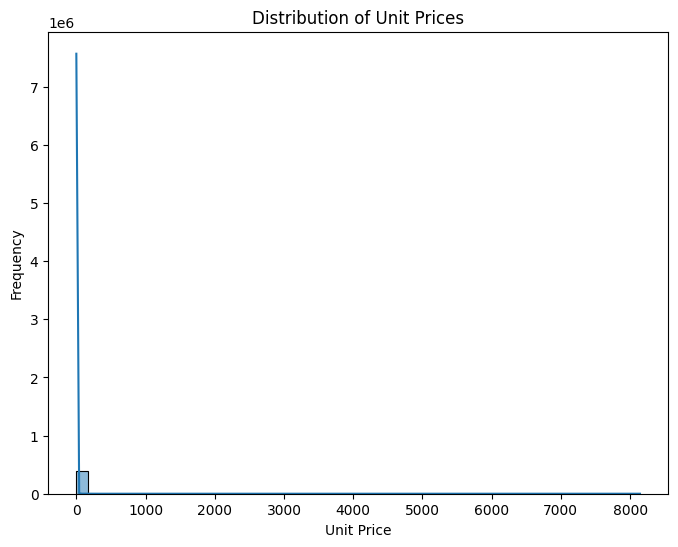

In [26]:
# 11. Distribution of Unit Price
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Distribution of Unit Prices")
plt.show()

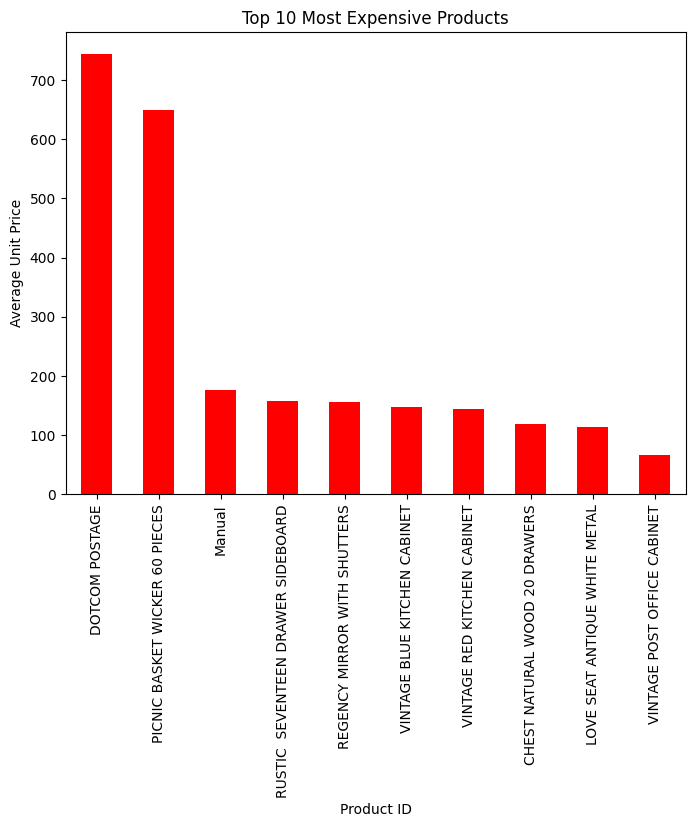

In [27]:


# 12. Top 10 Most Expensive Products
expensive_products = df.groupby('Description')['UnitPrice'].mean().nlargest(10)
plt.figure(figsize=(8, 6))
expensive_products.plot(kind='bar', color='red')
plt.xlabel("Product ID")
plt.ylabel("Average Unit Price")
plt.title("Top 10 Most Expensive Products")
plt.show()

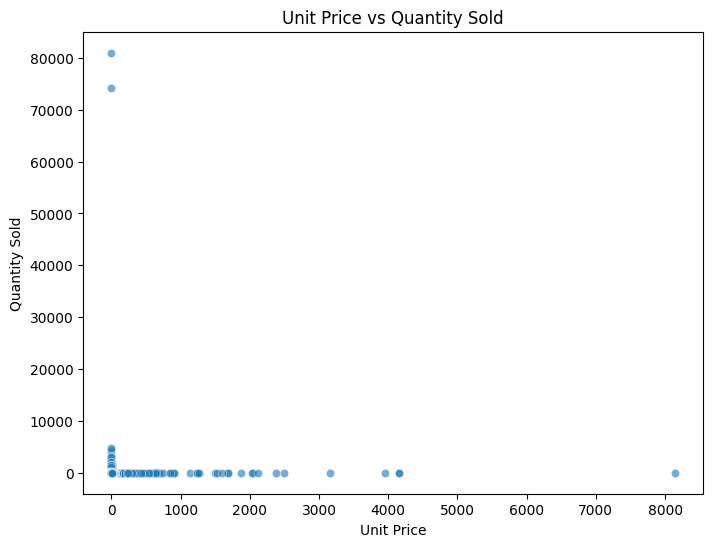

In [28]:
# 13. Relationship Between Unit Price and Quantity Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['UnitPrice'], y=df['Quantity'], alpha=0.6)
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.title("Unit Price vs Quantity Sold")
plt.show()

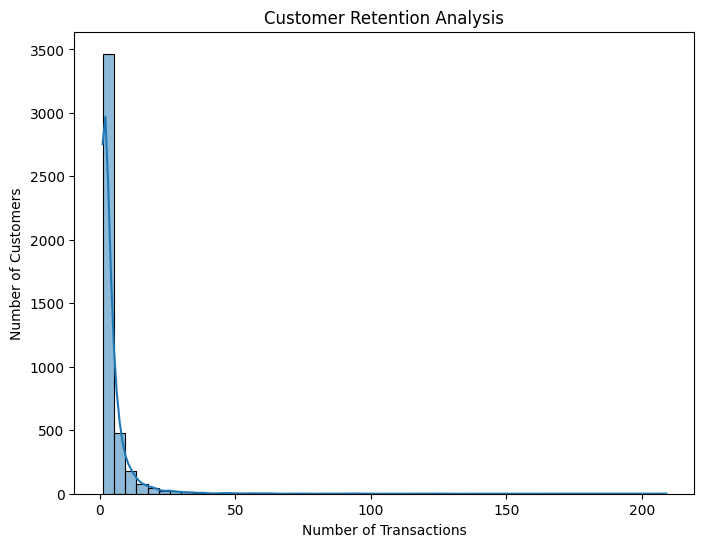

In [29]:

# 14. Customer Retention Analysis (Repeat Customers)
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(8, 6))
sns.histplot(repeat_customers, bins=50, kde=True)
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.title("Customer Retention Analysis")
plt.show()

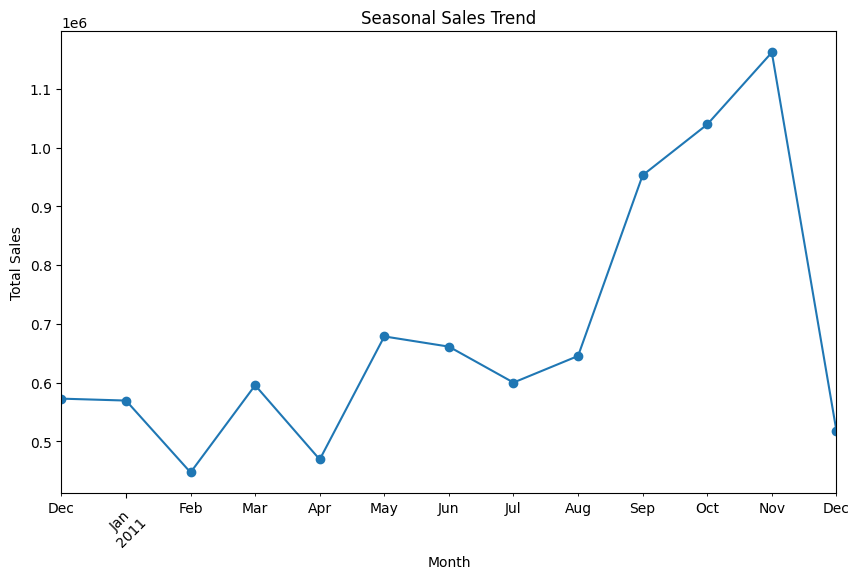

In [30]:

# 15. Seasonal Sales Trend
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
seasonal_sales = df.groupby('YearMonth')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
seasonal_sales.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Seasonal Sales Trend")
plt.xticks(rotation=45)
plt.show()

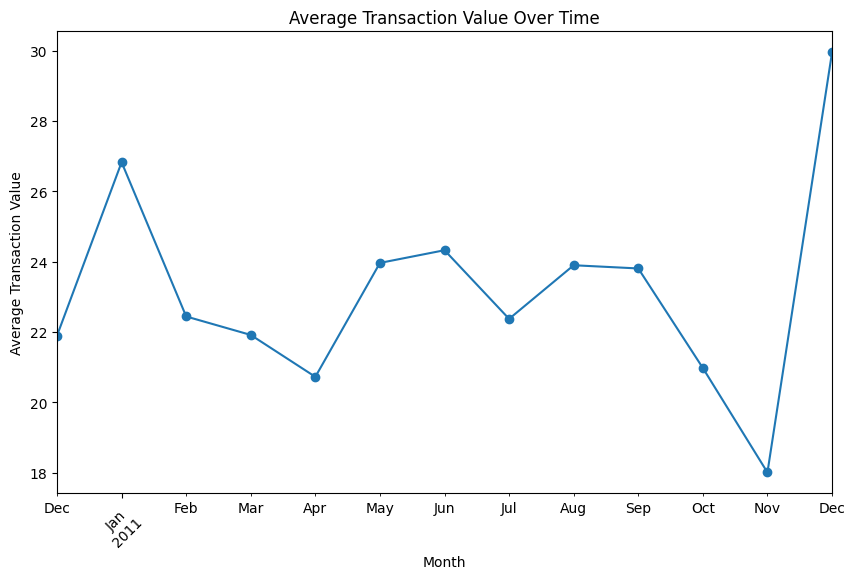

In [31]:

# 16. Average Transaction Value Over Time
avg_transaction_value = df.groupby('Month')['TotalPrice'].mean()
plt.figure(figsize=(10, 6))
avg_transaction_value.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Transaction Value")
plt.title("Average Transaction Value Over Time")
plt.xticks(rotation=45)
plt.show()

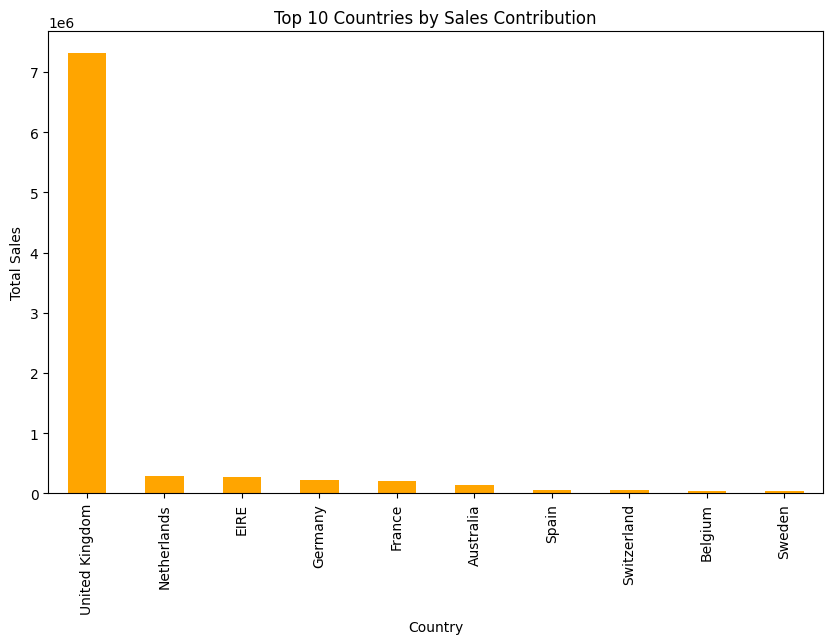

In [32]:
# 18. Sales Contribution by Country
country_sales = df.groupby('Country')['TotalPrice'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='orange')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Top 10 Countries by Sales Contribution")
plt.show()


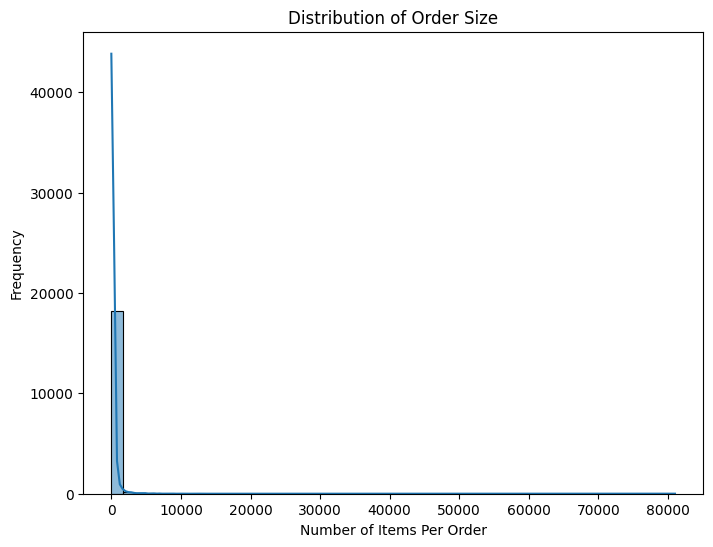

In [33]:
# 19. Average Order Size (Items per Order)
avg_order_size = df.groupby('InvoiceNo')['Quantity'].sum()
plt.figure(figsize=(8, 6))
sns.histplot(avg_order_size, bins=50, kde=True)
plt.xlabel("Number of Items Per Order")
plt.ylabel("Frequency")
plt.title("Distribution of Order Size")
plt.show()

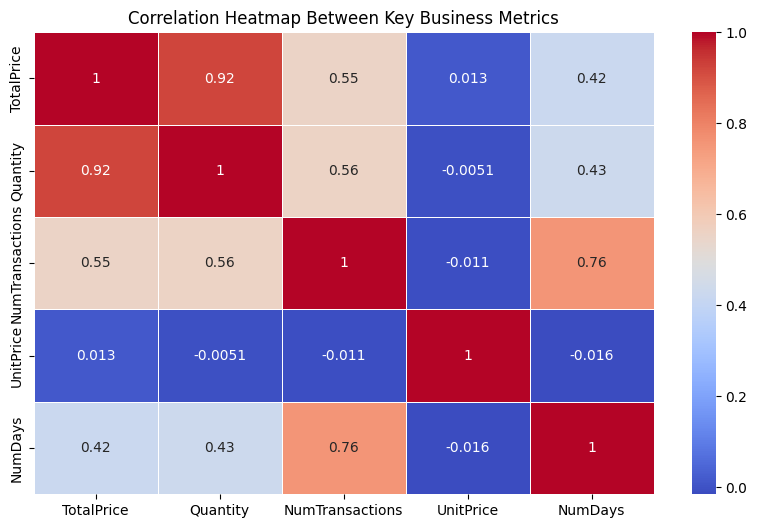

In [34]:




# 20. Correlation Heatmap Between Key Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Between Key Business Metrics")
plt.show()



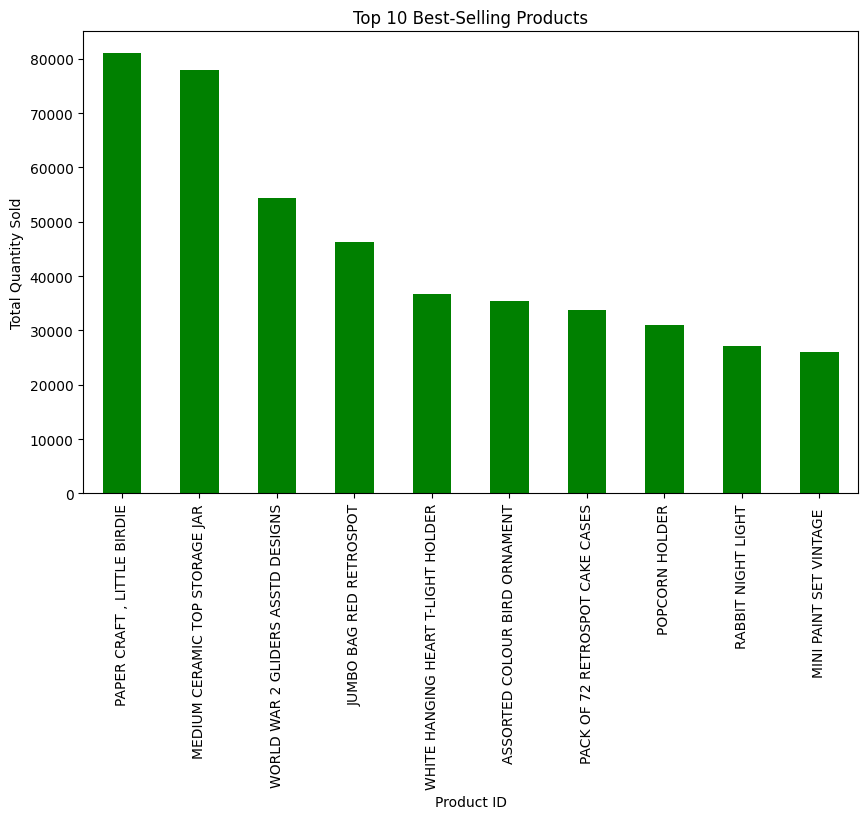

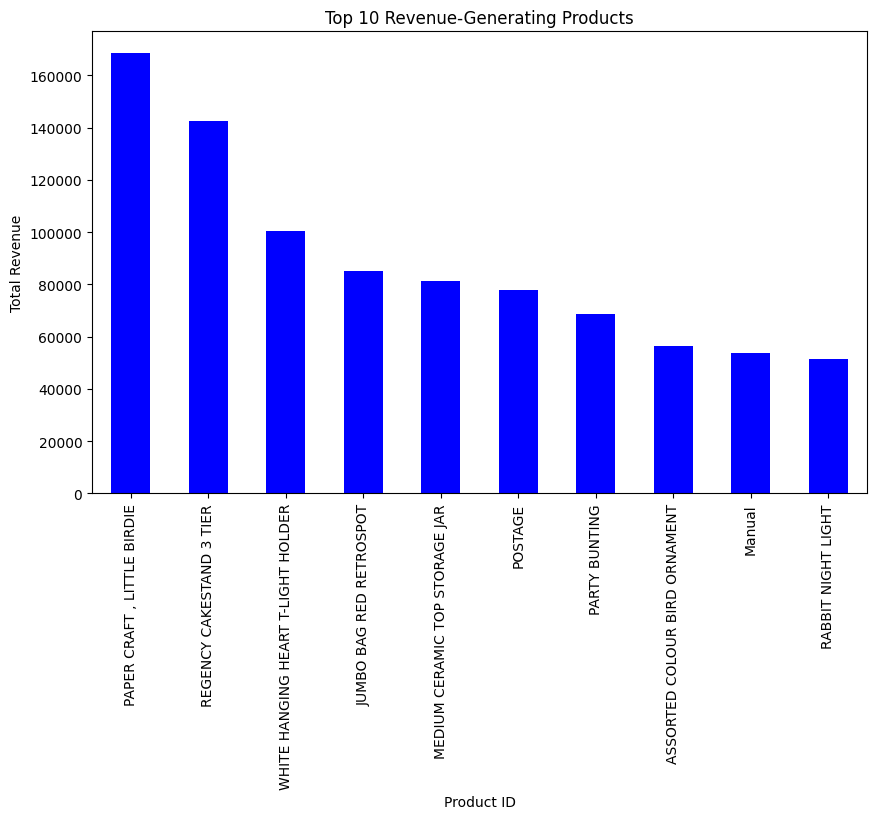

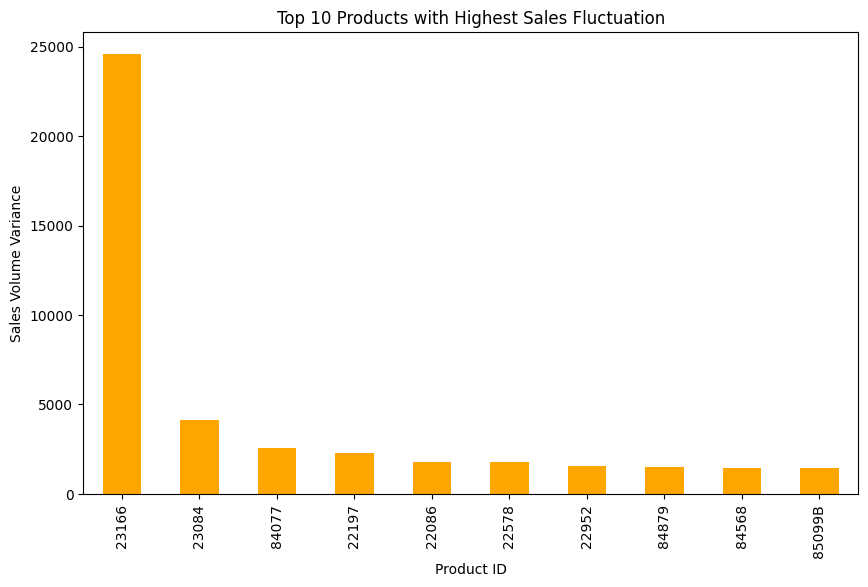

<Figure size 1200x600 with 0 Axes>

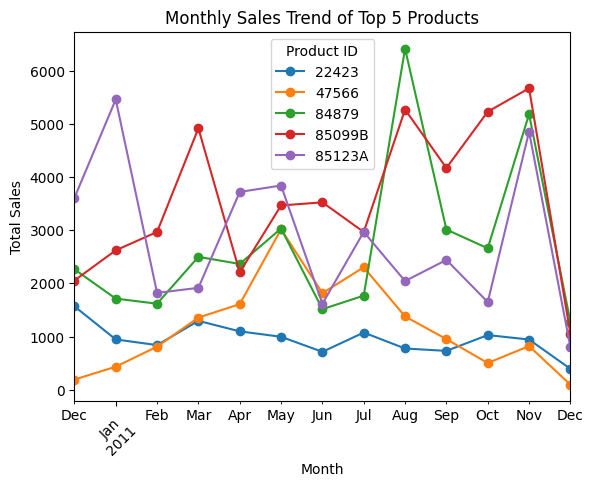

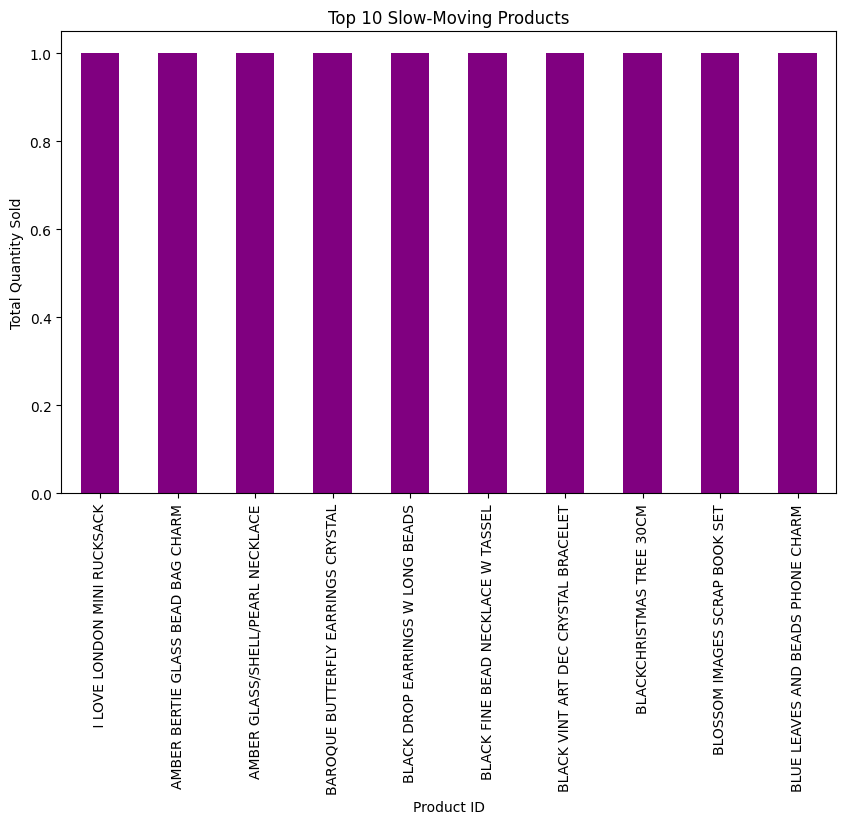

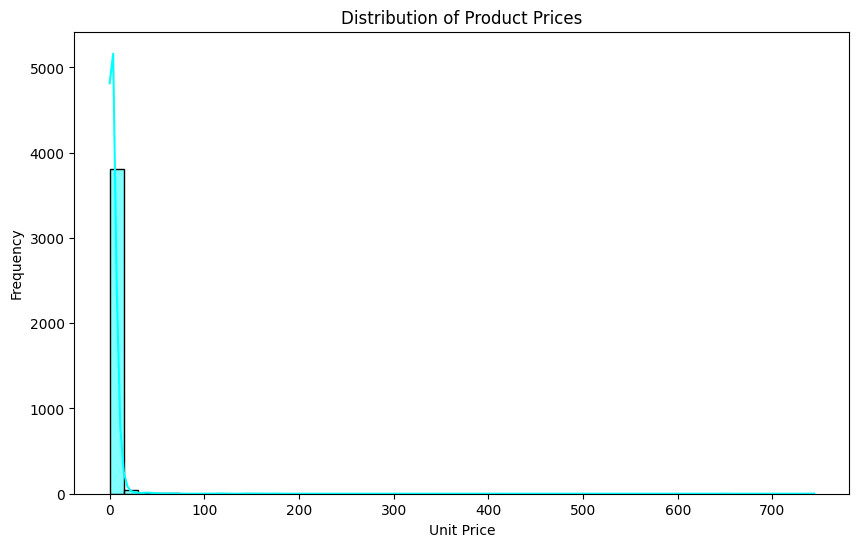

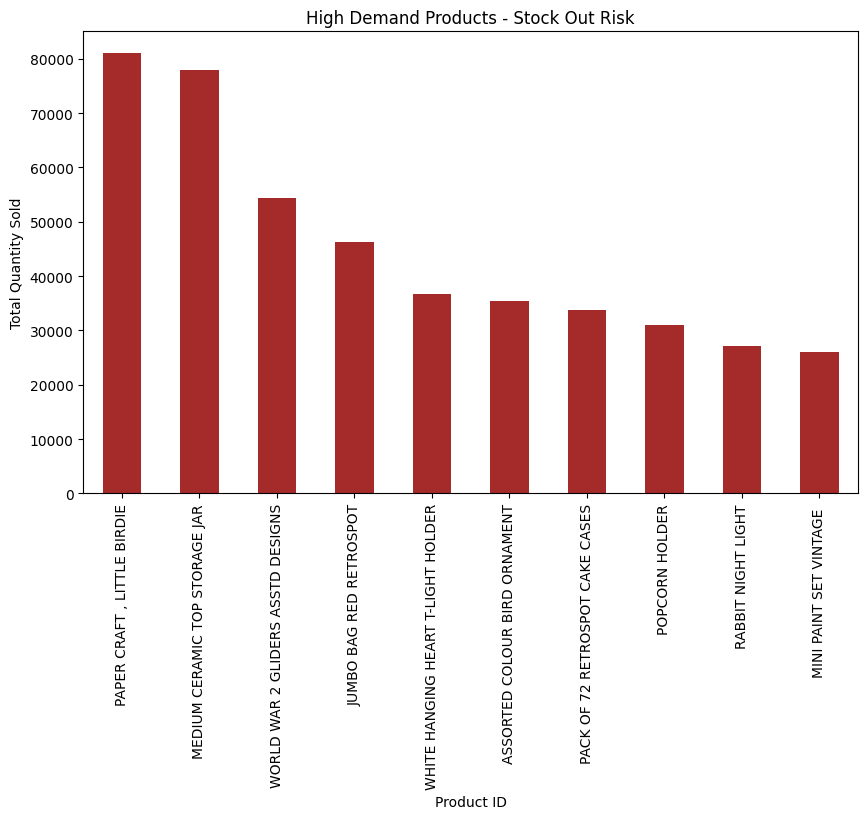

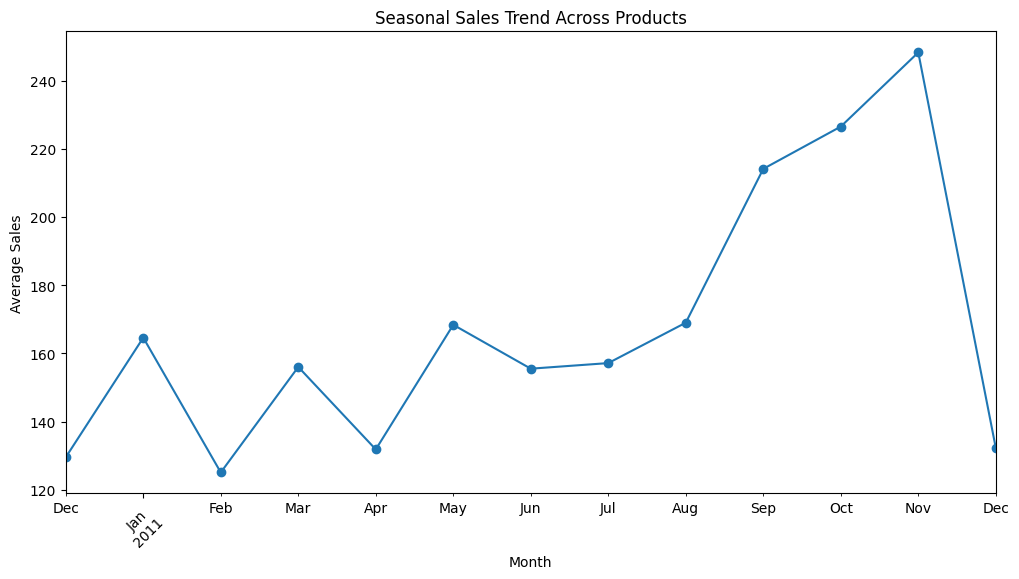

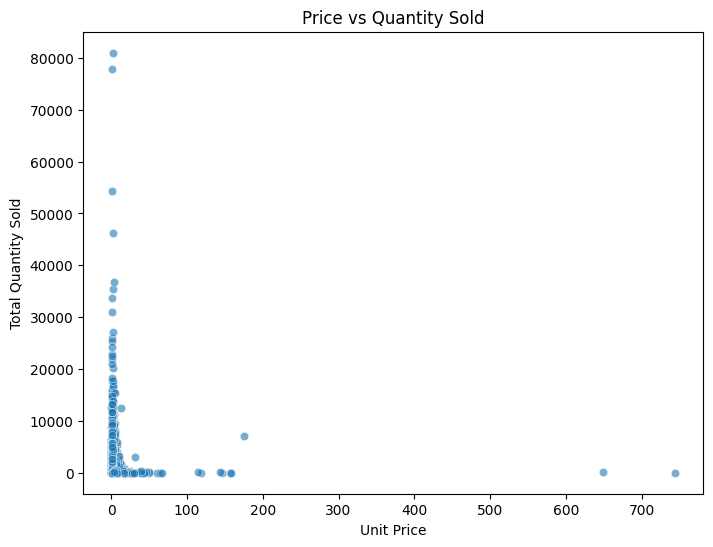

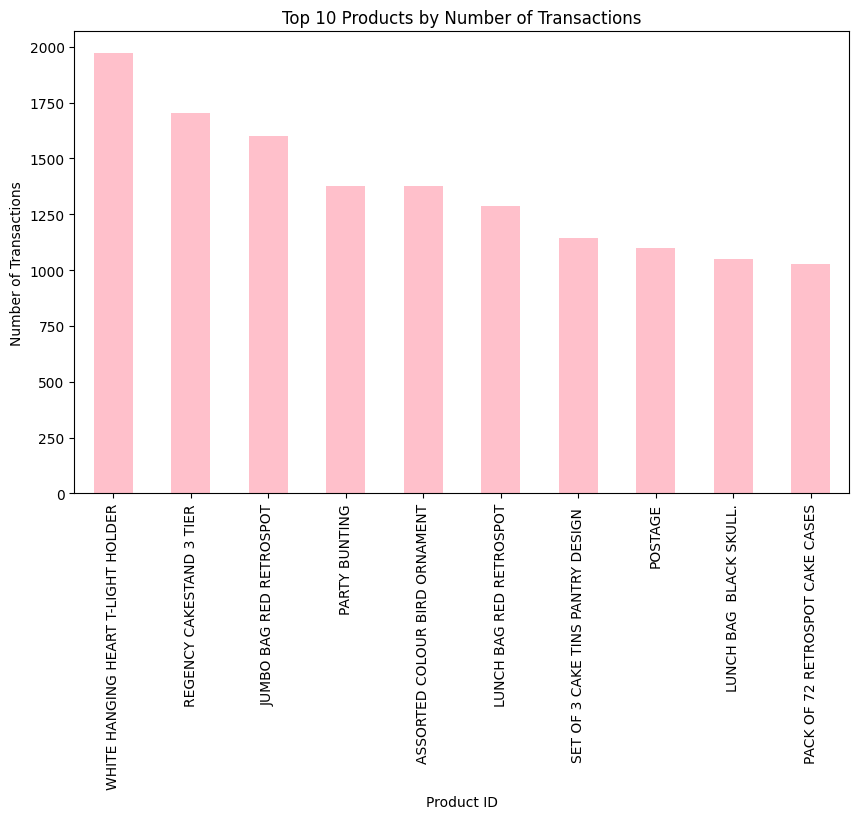

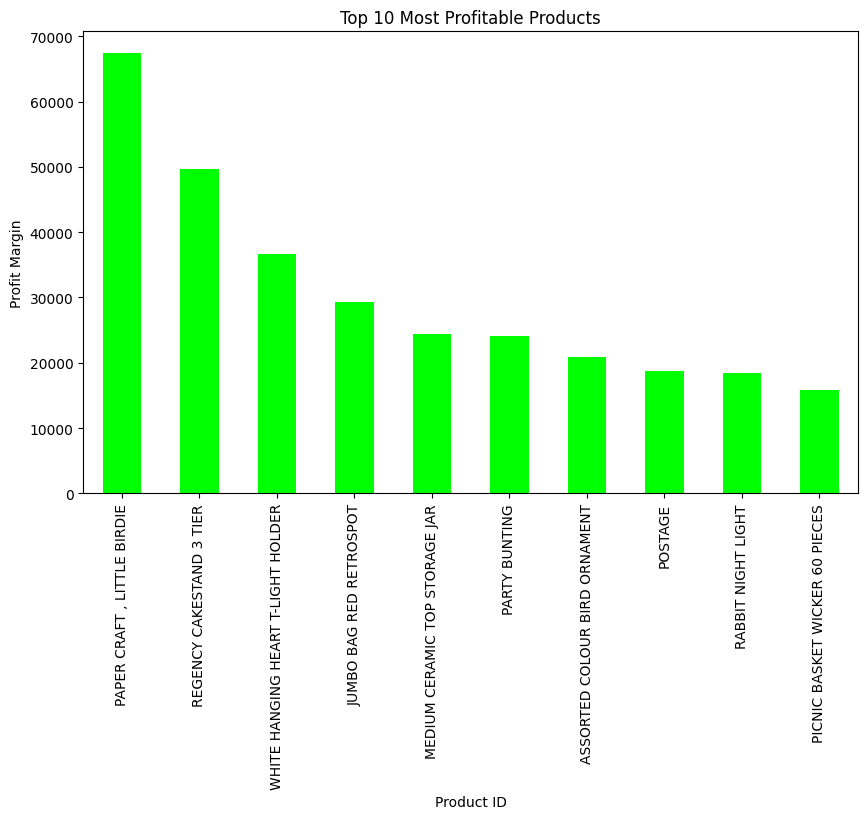

In [5]:


# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate data for Inventory Analysis
inventory_data = df.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',  # Number of transactions per product
    'UnitPrice': 'mean'
}).rename(columns={'InvoiceNo': 'NumTransactions'})

# 1. Top 10 Best-Selling Products
plt.figure(figsize=(10, 6))
top_selling = inventory_data['Quantity'].nlargest(10)
top_selling.plot(kind='bar', color='green')
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Best-Selling Products")
plt.show()

# 2. Top 10 Revenue-Generating Products
plt.figure(figsize=(10, 6))
top_revenue = inventory_data['TotalPrice'].nlargest(10)
top_revenue.plot(kind='bar', color='blue')
plt.xlabel("Product ID")
plt.ylabel("Total Revenue")
plt.title("Top 10 Revenue-Generating Products")
plt.show()

# 3. Products with Highest Sales Volume Fluctuation
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales_variance = df.groupby(['StockCode', 'Month'])['Quantity'].sum().unstack().std(axis=1)
top_fluctuating = monthly_sales_variance.nlargest(10)
plt.figure(figsize=(10, 6))
top_fluctuating.plot(kind='bar', color='orange')
plt.xlabel("Product ID")
plt.ylabel("Sales Volume Variance")
plt.title("Top 10 Products with Highest Sales Fluctuation")
plt.show()


# 5. Demand Trend for Top 5 Products
top_products = df['StockCode'].value_counts().nlargest(5).index
top_products_sales = df[df['StockCode'].isin(top_products)].groupby(['Month', 'StockCode'])['Quantity'].sum().unstack()
plt.figure(figsize=(12, 6))
top_products_sales.plot(marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend of Top 5 Products")
plt.legend(title="Product ID")
plt.xticks(rotation=45)
plt.show()

# 6. Identifying Slow-Moving Inventory
low_sales_products = inventory_data['Quantity'].nsmallest(10)
plt.figure(figsize=(10, 6))
low_sales_products.plot(kind='bar', color='purple')
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Slow-Moving Products")
plt.show()

# 7. High-Value vs Low-Value Products
plt.figure(figsize=(10, 6))
sns.histplot(inventory_data['UnitPrice'], bins=50, kde=True, color='cyan')
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")
plt.show()

# 8. Stock Out Risk Analysis (High Demand but Low Inventory)
demand_vs_stock = inventory_data.sort_values(by=['Quantity'], ascending=False).nlargest(10, 'Quantity')
plt.figure(figsize=(10, 6))
demand_vs_stock['Quantity'].plot(kind='bar', color='brown')
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("High Demand Products - Stock Out Risk")
plt.show()

# 9. Seasonal Patterns in Product Sales
seasonal_trend = df.groupby(['Month', 'StockCode'])['Quantity'].sum().unstack().mean(axis=1)
plt.figure(figsize=(12, 6))
seasonal_trend.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Seasonal Sales Trend Across Products")
plt.xticks(rotation=45)
plt.show()

# 10. Correlation Between Price and Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=inventory_data['UnitPrice'], y=inventory_data['Quantity'], alpha=0.6)
plt.xlabel("Unit Price")
plt.ylabel("Total Quantity Sold")
plt.title("Price vs Quantity Sold")
plt.show()

# 11. Top 10 Products by Number of Transactions
plt.figure(figsize=(10, 6))
top_transaction_products = inventory_data['NumTransactions'].nlargest(10)
top_transaction_products.plot(kind='bar', color='pink')
plt.xlabel("Product ID")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Products by Number of Transactions")
plt.show()

# 12. Profit Margin Analysis
inventory_data['ProfitMargin'] = inventory_data['TotalPrice'] - (inventory_data['Quantity'] * inventory_data['UnitPrice'] * 0.6)  # Assuming 60% cost price
plt.figure(figsize=(10, 6))
inventory_data['ProfitMargin'].nlargest(10).plot(kind='bar', color='lime')
plt.xlabel("Product ID")
plt.ylabel("Profit Margin")
plt.title("Top 10 Most Profitable Products")
plt.show()




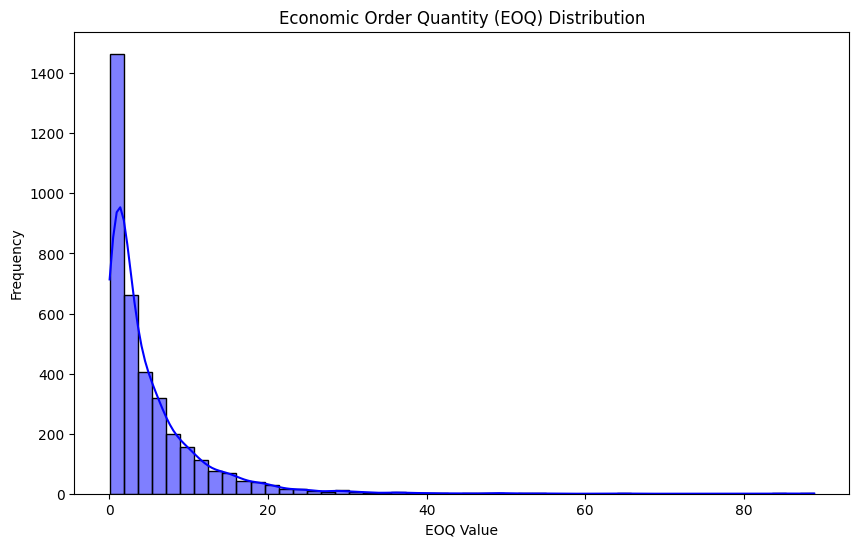

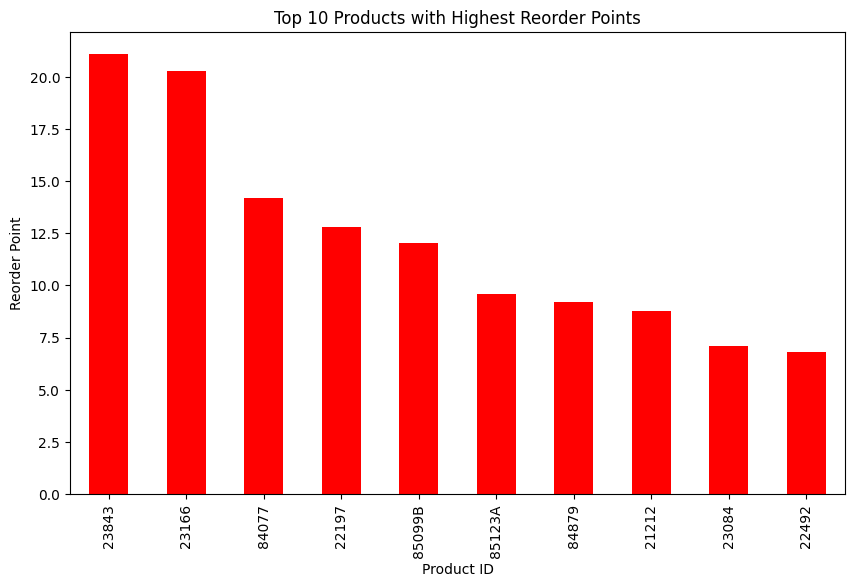

No products are currently at high stock-out risk.


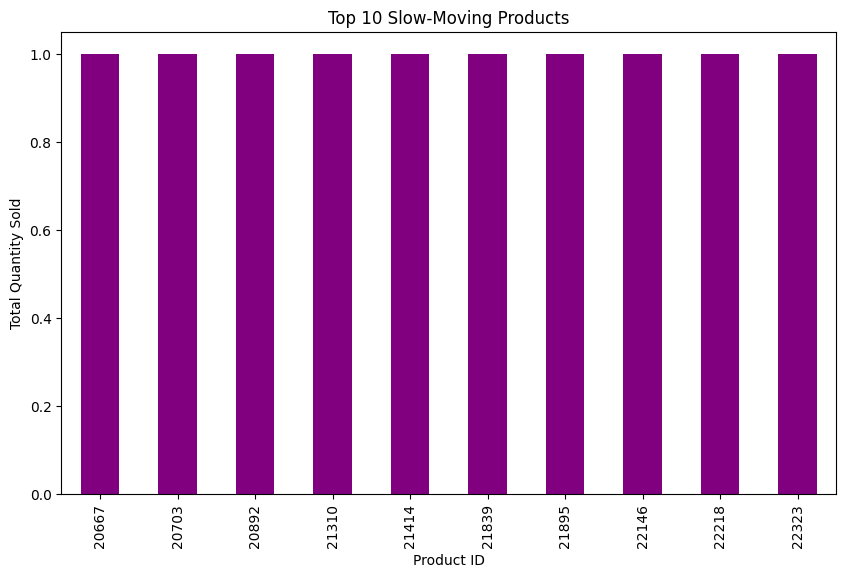

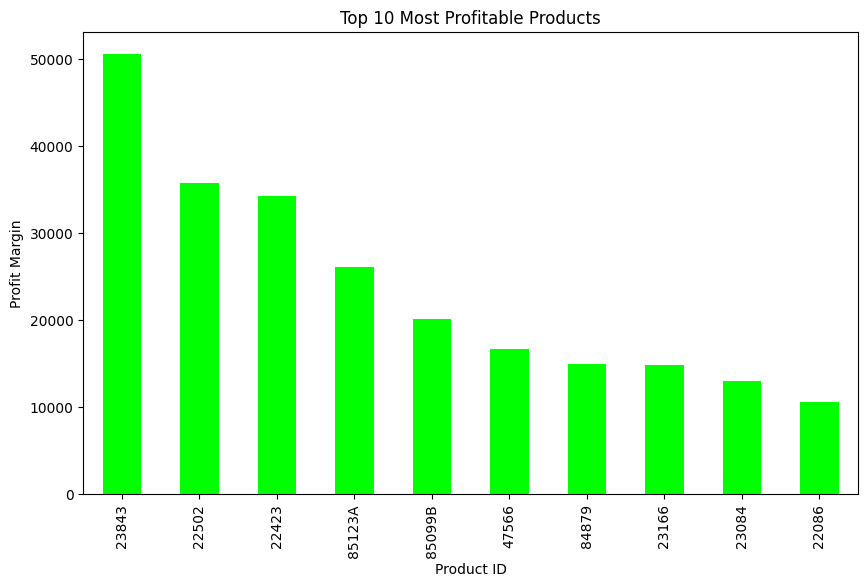

Inventory optimization results saved to inventory_optimization_results.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate data for Inventory Analysis
inventory_data = df.groupby('StockCode').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',  # Number of transactions per product
    'UnitPrice': 'mean'
}).rename(columns={'InvoiceNo': 'NumTransactions'})

# Assume demand follows a normal distribution for EOQ calculation
inventory_data['DailyDemand'] = inventory_data['Quantity'] / df['InvoiceDate'].nunique()

# Adjusted Economic Order Quantity (EOQ) Calculation for Higher Stock-Out Risk
holding_cost_per_unit = 0.3 * inventory_data['UnitPrice']  # Increased to 30% to impact EOQ
ordering_cost = 100  # Increased ordering cost to influence order size
inventory_data['EOQ'] = np.sqrt((2 * inventory_data['DailyDemand'] * ordering_cost) / holding_cost_per_unit)

# Adjusted Reorder Point Calculation (Shorter lead time & increased safety stock)
lead_time = 3  # Reduced lead time to increase stock-out risks
safety_stock = inventory_data['DailyDemand'] * 1.5  # Increased safety stock buffer
inventory_data['ReorderPoint'] = (inventory_data['DailyDemand'] * lead_time) + safety_stock

# Identify High Stock-Out Risk Products
inventory_data['StockOutRisk'] = inventory_data['Quantity'] < inventory_data['ReorderPoint']

# Identify Slow-Moving Products
slow_moving_threshold = inventory_data['Quantity'].quantile(0.3)  # Increased threshold to capture more slow-moving items
inventory_data['SlowMoving'] = inventory_data['Quantity'] < slow_moving_threshold

# Adjusted Profitability Calculation with Higher Cost Assumptions
inventory_data['ProfitMargin'] = inventory_data['TotalPrice'] - (inventory_data['Quantity'] * inventory_data['UnitPrice'] * 0.7)  # Increased cost percentage to 70%

# 1. EOQ Distribution
plt.figure(figsize=(10, 6))
sns.histplot(inventory_data['EOQ'], bins=50, kde=True, color='blue')
plt.xlabel("EOQ Value")
plt.ylabel("Frequency")
plt.title("Economic Order Quantity (EOQ) Distribution")
plt.show()

# 2. Reorder Point Analysis
plt.figure(figsize=(10, 6))
inventory_data['ReorderPoint'].nlargest(10).plot(kind='bar', color='red')
plt.xlabel("Product ID")
plt.ylabel("Reorder Point")
plt.title("Top 10 Products with Highest Reorder Points")
plt.show()

# 3. High Stock-Out Risk Products
high_stock_out_risk = inventory_data[inventory_data['StockOutRisk']]
if not high_stock_out_risk.empty:
    plt.figure(figsize=(10, 6))
    high_stock_out_risk['Quantity'].nsmallest(10).plot(kind='bar', color='brown')
    plt.xlabel("Product ID")
    plt.ylabel("Stock Level")
    plt.title("Top 10 Products with High Stock-Out Risk")
    plt.show()
else:
    print("No products are currently at high stock-out risk.")

# 4. Slow-Moving Inventory
plt.figure(figsize=(10, 6))
inventory_data[inventory_data['SlowMoving']]['Quantity'].nsmallest(10).plot(kind='bar', color='purple')
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Slow-Moving Products")
plt.show()

# 5. Most Profitable Products
plt.figure(figsize=(10, 6))
inventory_data['ProfitMargin'].nlargest(10).plot(kind='bar', color='lime')
plt.xlabel("Product ID")
plt.ylabel("Profit Margin")
plt.title("Top 10 Most Profitable Products")
plt.show()

# Save inventory optimization results
inventory_data.to_csv("inventory_optimization_results.csv")
print("Inventory optimization results saved to inventory_optimization_results.csv")


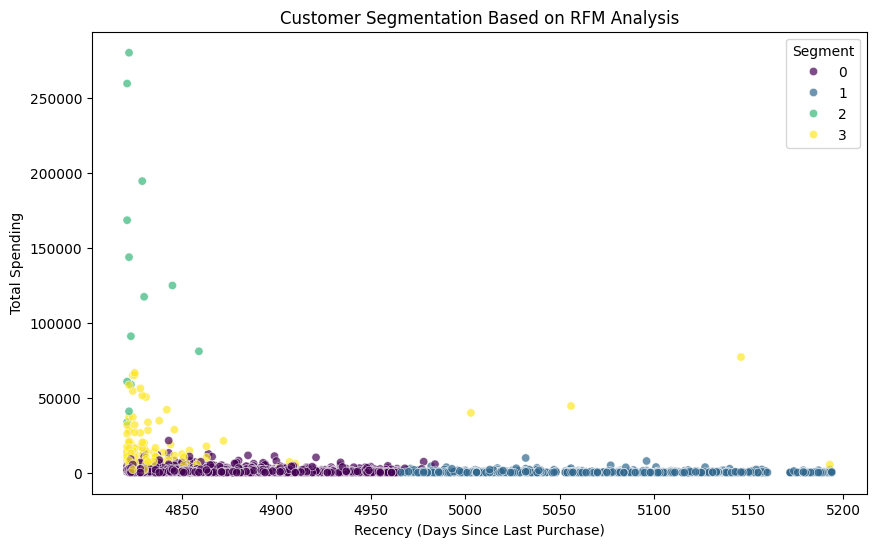

Segment Summary:
             Recency  Frequency       Monetary
Segment                                       
0        4864.433007   3.678758    1358.166913
1        5069.173421   1.551367     478.194732
2        4827.615385  82.538462  127338.313846
3        4835.955882  22.333333   12709.090490
Customer segmentation results saved to customer_segmentation_results.csv


In [16]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Customer-Level Data for Segmentation
customer_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (datetime.now() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary' })

# Normalize Data for Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
customer_data['Segment'] = kmeans_labels

# Visualize Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['Recency'], y=customer_data['Monetary'], hue=customer_data['Segment'], palette='viridis', alpha=0.7)
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Total Spending")
plt.title("Customer Segmentation Based on RFM Analysis")
plt.legend(title="Segment")
plt.show()

# Segment Insights
segment_summary = customer_data.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print("Segment Summary:")
print(segment_summary)

# Save customer segmentation results
customer_data.to_csv("customer_segmentation_results.csv")
print("Customer segmentation results saved to customer_segmentation_results.csv")


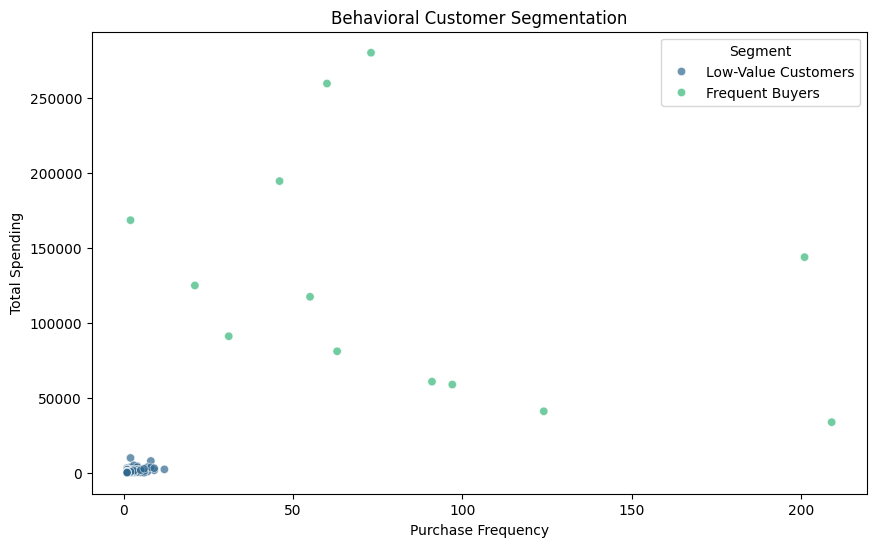

Segment Summary:
                         Recency  Frequency       Monetary
Segment_Label                                             
Frequent Buyers      4827.615385  82.538462  127338.313846
Low-Value Customers  5069.173421   1.551367     478.194732
Customer segmentation results saved to customer_behavioral_segmentation_results.csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime



# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Customer-Level Data for Segmentation
customer_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (datetime.datetime.now() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Normalize Data for Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Apply K-Means Clustering (Increase to 4 Clusters for Better Segmentation)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # More clusters to ensure VIPs are distinct
kmeans_labels = kmeans.fit_predict(scaled_data)
customer_data['Segment'] = kmeans_labels

# Assign Cluster Labels Meaningfully (Ensure High-Spending VIPs are Identified)
segment_means = customer_data.groupby('Segment').mean()
segment_map = {
    segment_means['Monetary'].idxmax(): 'High-Spending VIPs',
    segment_means['Frequency'].idxmax(): 'Frequent Buyers',
    segment_means['Recency'].idxmax(): 'One-Time Shoppers',
    segment_means['Monetary'].idxmin(): 'Low-Value Customers'
}
customer_data['Segment_Label'] = customer_data['Segment'].map(segment_map)

# Visualize Behavioral Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['Frequency'], y=customer_data['Monetary'], hue=customer_data['Segment_Label'], palette='viridis', alpha=0.7)
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending")
plt.title("Behavioral Customer Segmentation")
plt.legend(title="Segment")
plt.show()

# Segment Insights
segment_summary = customer_data.groupby('Segment_Label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print("Segment Summary:")
print(segment_summary)

# Save customer segmentation results
customer_data.to_csv("customer_behavioral_segmentation_results.csv")
print("Customer segmentation results saved to customer_behavioral_segmentation_results.csv")


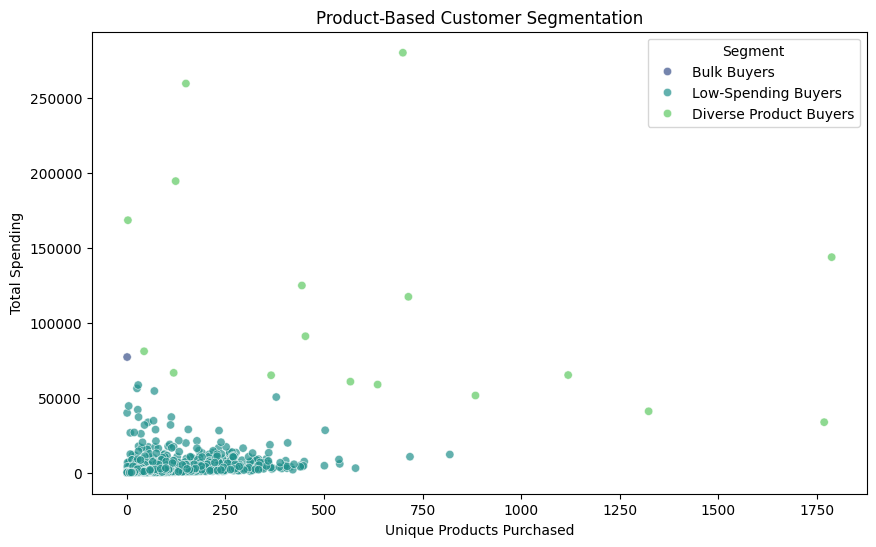

Segment Summary:
                        UniqueProducts      Quantity       Monetary  \
Segment_Label                                                         
Bulk Buyers                   1.000000  74215.000000   77183.600000   
Diverse Product Buyers      658.882353  61097.294118  111987.255882   
Low-Spending Buyers          59.177819    938.861310    1604.169450   

                        BulkPreference  
Segment_Label                           
Bulk Buyers               74215.000000  
Diverse Product Buyers     1791.349720  
Low-Spending Buyers          31.973028  
Customer product segmentation results saved to customer_product_segmentation_results.csv


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime


# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Product-Based Segmentation Data
customer_product_data = df.groupby('CustomerID').agg({
    'StockCode': pd.Series.nunique,  # Number of unique products purchased
    'Quantity': 'sum',  # Total quantity of products purchased
    'TotalPrice': 'sum',  # Total spending
    'UnitPrice': 'mean'  # Average price per item
}).rename(columns={'StockCode': 'UniqueProducts', 'TotalPrice': 'Monetary'})

# Define Bulk Order Preference (Average order size)
customer_product_data['BulkPreference'] = customer_product_data['Quantity'] / customer_product_data['UniqueProducts']

# Normalize Data for Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_product_data)

# Apply K-Means Clustering (Segmenting Based on Product Preferences)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
customer_product_data['Segment'] = kmeans_labels

# Assign Cluster Labels Meaningfully
segment_means = customer_product_data.groupby('Segment').mean()
segment_map = {
    segment_means['Monetary'].idxmax(): 'High-Margin Buyers',
    segment_means['BulkPreference'].idxmax(): 'Bulk Buyers',
    segment_means['UniqueProducts'].idxmax(): 'Diverse Product Buyers',
    segment_means['Monetary'].idxmin(): 'Low-Spending Buyers'
}
customer_product_data['Segment_Label'] = customer_product_data['Segment'].map(segment_map)

# Visualize Product-Based Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_product_data['UniqueProducts'], y=customer_product_data['Monetary'], hue=customer_product_data['Segment_Label'], palette='viridis', alpha=0.7)
plt.xlabel("Unique Products Purchased")
plt.ylabel("Total Spending")
plt.title("Product-Based Customer Segmentation")
plt.legend(title="Segment")
plt.show()

# Segment Insights
segment_summary = customer_product_data.groupby('Segment_Label').agg({
    'UniqueProducts': 'mean',
    'Quantity': 'mean',
    'Monetary': 'mean',
    'BulkPreference': 'mean'
})
print("Segment Summary:")
print(segment_summary)

# Save product-based segmentation results
customer_product_data.to_csv("customer_product_segmentation_results.csv")
print("Customer product segmentation results saved to customer_product_segmentation_results.csv")


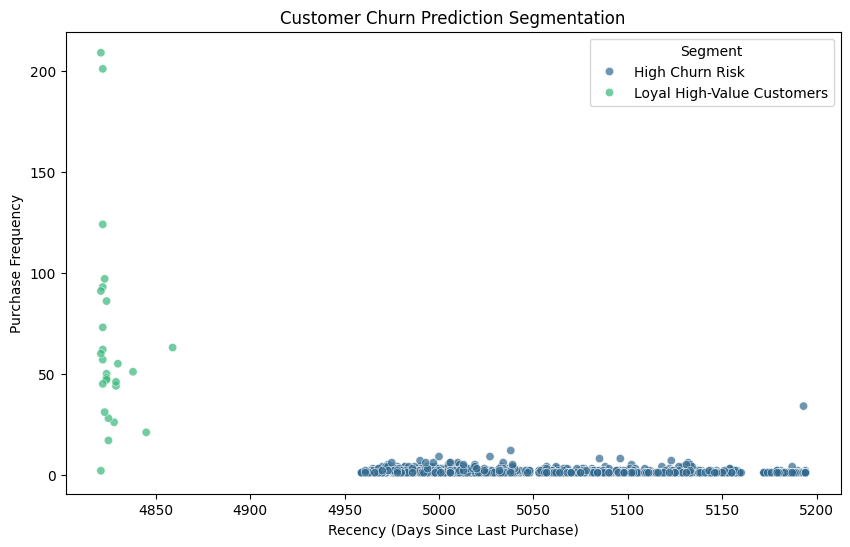

Segment Summary:
                                Recency  Frequency      Monetary
Segment_Label                                                   
High Churn Risk             5067.122355   1.581417    631.706220
Loyal High-Value Customers  4826.461538  66.423077  85904.351538
Customer churn segmentation results saved to customer_churn_segmentation_results.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime



# Data Preprocessing
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Churn Prediction Data
customer_churn_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (datetime.datetime.now() - x.max()).days,  # Recency (days since last purchase)
    'InvoiceNo': 'nunique',  # Frequency (number of purchases)
    'TotalPrice': 'sum'  # Monetary (total spending)
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Normalize Data for Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_churn_data)

# Apply K-Means Clustering for Churn Prediction
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
customer_churn_data['Segment'] = kmeans_labels

# Assign Cluster Labels Meaningfully
segment_means = customer_churn_data.groupby('Segment').mean()
segment_map = {
    segment_means['Recency'].idxmax(): 'High Churn Risk',  # Customers who haven't purchased in a long time
    segment_means['Frequency'].idxmax(): 'Active Customers',  # Frequent buyers
    segment_means['Monetary'].idxmax(): 'Loyal High-Value Customers'  # High spenders
}
customer_churn_data['Segment_Label'] = customer_churn_data['Segment'].map(segment_map)

# Visualize Churn Prediction Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_churn_data['Recency'], y=customer_churn_data['Frequency'], hue=customer_churn_data['Segment_Label'], palette='viridis', alpha=0.7)
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Purchase Frequency")
plt.title("Customer Churn Prediction Segmentation")
plt.legend(title="Segment")
plt.show()

# Segment Insights
segment_summary = customer_churn_data.groupby('Segment_Label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print("Segment Summary:")
print(segment_summary)

# Save churn prediction segmentation results
customer_churn_data.to_csv("customer_churn_segmentation_results.csv")
print("Customer churn segmentation results saved to customer_churn_segmentation_results.csv")
